# Import Libraries

In [66]:
import pandas as pd

In [67]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings 
warnings.filterwarnings('ignore')

In [68]:
df = pd.read_csv(r"C:\Users\nikhi\Downloads\laptop_prices.csv")

# Data Exploration

In [53]:
df.head()

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560,...,Yes,Intel,2.3,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440,...,No,Intel,1.8,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920,...,No,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880,...,Yes,Intel,2.7,Core i7,512,0,SSD,No,AMD,Radeon Pro 455
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,2560,...,Yes,Intel,3.1,Core i5,256,0,SSD,No,Intel,Iris Plus Graphics 650


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1275 non-null   object 
 1   Product               1275 non-null   object 
 2   TypeName              1275 non-null   object 
 3   Inches                1275 non-null   float64
 4   Ram                   1275 non-null   int64  
 5   OS                    1275 non-null   object 
 6   Weight                1275 non-null   float64
 7   Price_euros           1275 non-null   float64
 8   Screen                1275 non-null   object 
 9   ScreenW               1275 non-null   int64  
 10  ScreenH               1275 non-null   int64  
 11  Touchscreen           1275 non-null   object 
 12  IPSpanel              1275 non-null   object 
 13  RetinaDisplay         1275 non-null   object 
 14  CPU_company           1275 non-null   object 
 15  CPU_freq             

In [11]:
df.isna().sum()

Company                 0
Product                 0
TypeName                0
Inches                  0
Ram                     0
OS                      0
Weight                  0
Price_euros             0
Screen                  0
ScreenW                 0
ScreenH                 0
Touchscreen             0
IPSpanel                0
RetinaDisplay           0
CPU_company             0
CPU_freq                0
CPU_model               0
PrimaryStorage          0
SecondaryStorage        0
PrimaryStorageType      0
SecondaryStorageType    0
GPU_company             0
GPU_model               0
dtype: int64

In [21]:
df.describe()

,Inches,Ram,Weight,Price_euros,ScreenW,ScreenH,CPU_freq,PrimaryStorage,SecondaryStorage
count,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000
mean,15.022902,8.440784,2.040525,1134.969059,1900.043922,1073.904314,2.302980,444.517647,176.069020
std,1.429470,5.097809,0.669196,700.752504,493.346186,283.883940,0.503846,365.537726,415.960655
min,10.100000,2.000000,0.690000,174.000000,1366.000000,768.000000,0.900000,8.000000,0.000000
25%,14.000000,4.000000,1.500000,609.000000,1920.000000,1080.000000,2.000000,256.000000,0.000000
50%,15.600000,8.000000,2.040000,989.000000,1920.000000,1080.000000,2.500000,256.000000,0.000000
75%,15.600000,8.000000,2.310000,1496.500000,1920.000000,1080.000000,2.700000,512.000000,0.000000
max,18.400000,64.000000,4.700000,6099.000000,3840.000000,2160.000000,3.600000,2048.000000,2048.000000


# Data Visualization

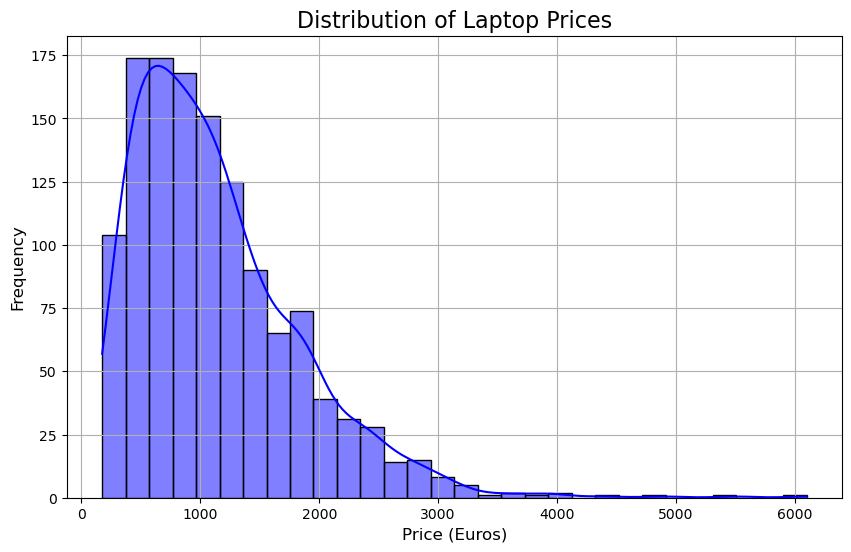

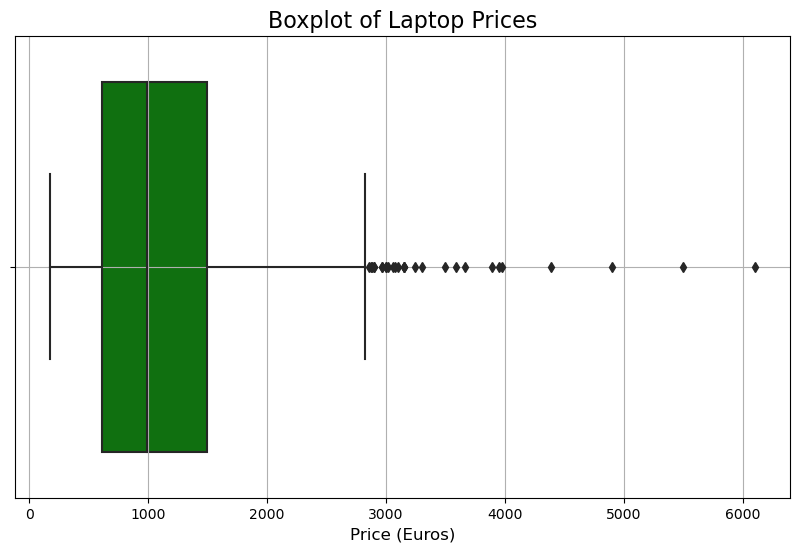

In [13]:
#Univariate analysis of the target variable 'Price_euros'
plt.figure(figsize=(10, 6))
sns.histplot(df['Price_euros'], bins=30, kde=True, color='blue')
plt.title('Distribution of Laptop Prices', fontsize=16)
plt.xlabel('Price (Euros)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)
plt.show()

# Boxplot to detect outliers in the price distribution
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Price_euros'], color='green')
plt.title('Boxplot of Laptop Prices', fontsize=16)
plt.xlabel('Price (Euros)', fontsize=12)
plt.grid(True)
plt.show()


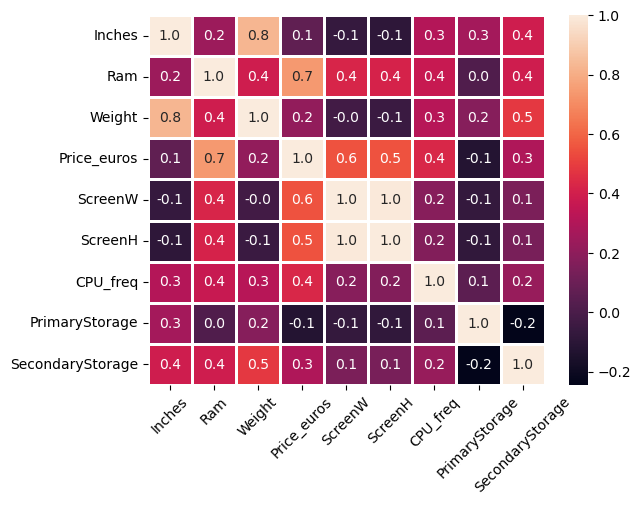

In [70]:
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt='.1f', linewidths=2)
plt.xticks(rotation=45)
plt.show()

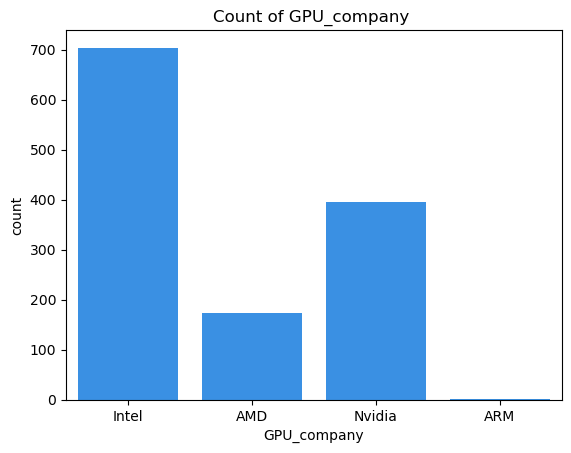

In [71]:
sns.countplot(df, x='GPU_company',color='dodgerblue')
plt.title('Count of GPU_company ')
plt.show()

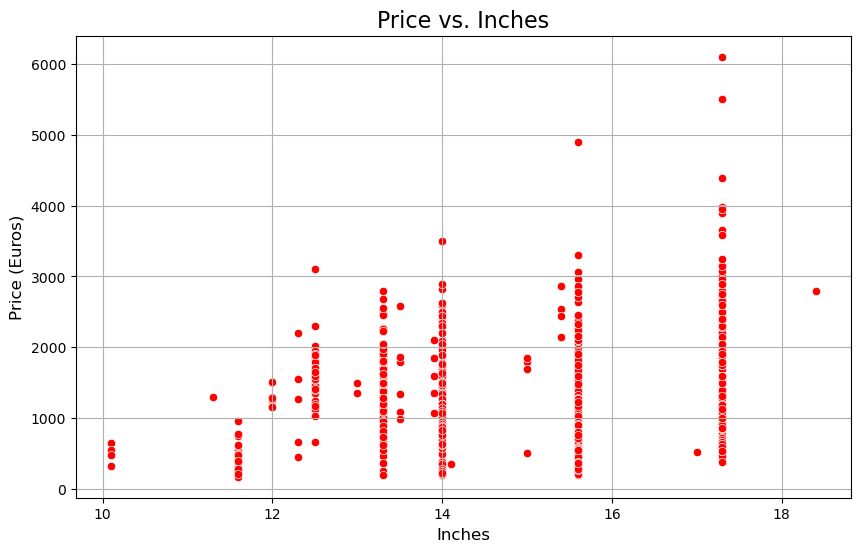

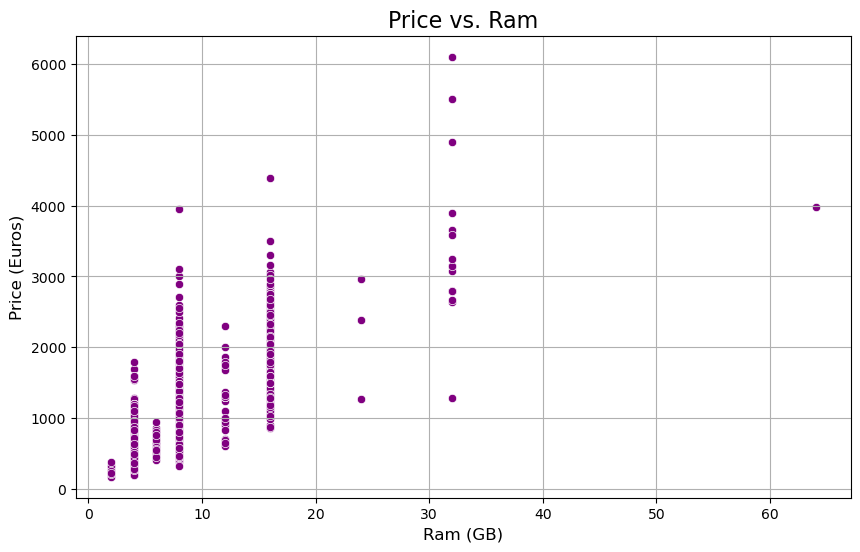

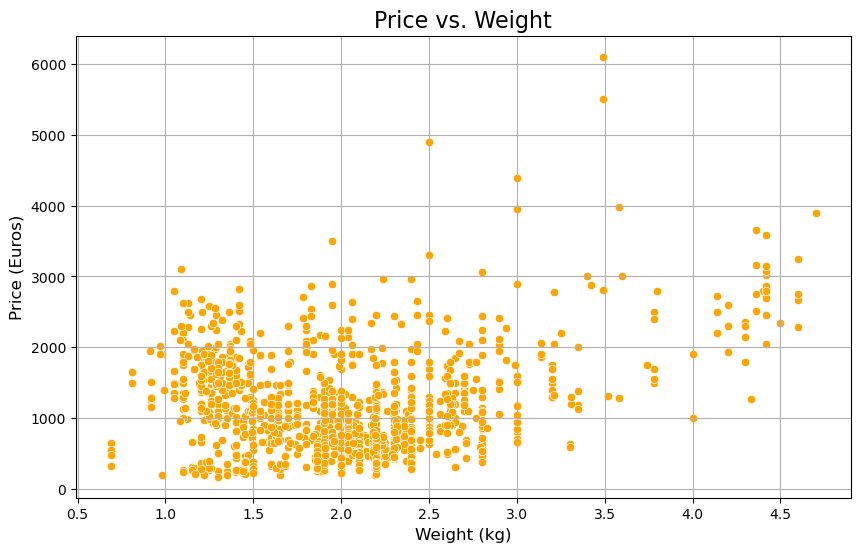

In [14]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Inches', y='Price_euros', data=df, color='red')
plt.title('Price vs. Inches', fontsize=16)
plt.xlabel('Inches', fontsize=12)
plt.ylabel('Price (Euros)', fontsize=12)
plt.grid(True)
plt.show()

# Relationship between Price and Ram
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Ram', y='Price_euros', data=df, color='purple')
plt.title('Price vs. Ram', fontsize=16)
plt.xlabel('Ram (GB)', fontsize=12)
plt.ylabel('Price (Euros)', fontsize=12)
plt.grid(True)
plt.show()

# Relationship between Price and Weight
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Weight', y='Price_euros', data=df, color='orange')
plt.title('Price vs. Weight', fontsize=16)
plt.xlabel('Weight (kg)', fontsize=12)
plt.ylabel('Price (Euros)', fontsize=12)
plt.grid(True)
plt.show()


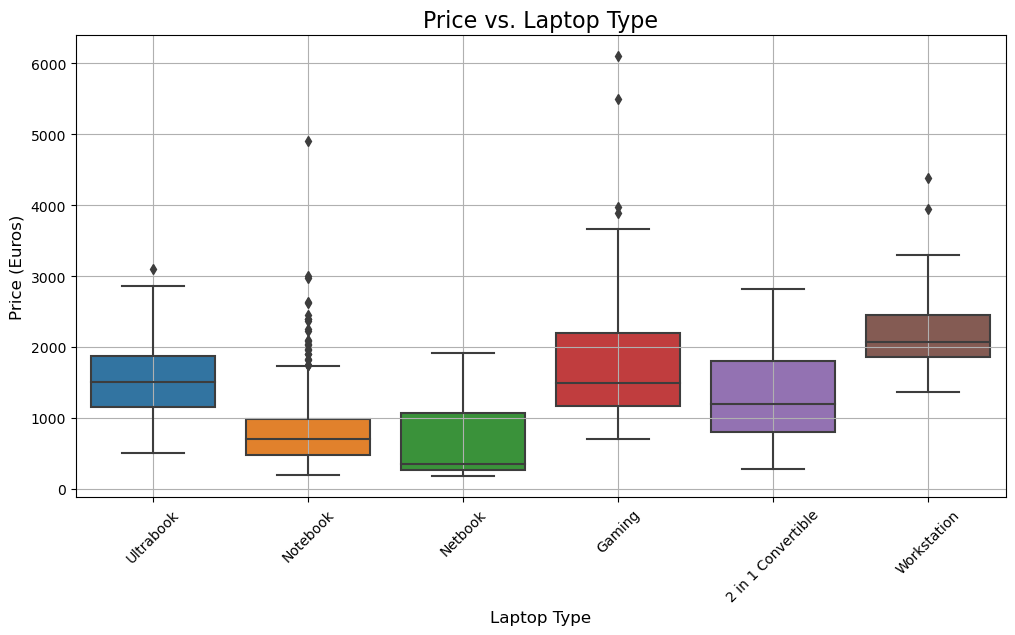

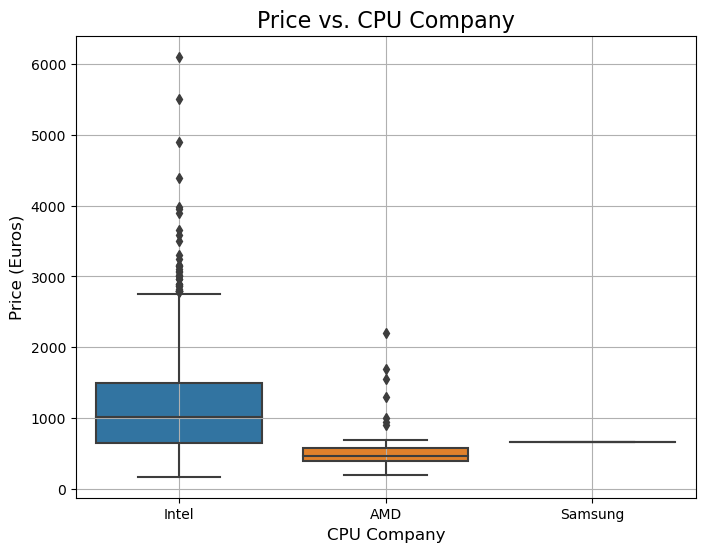

In [15]:
# Relationship between Price and TypeName (Laptop Type)
plt.figure(figsize=(12, 6))
sns.boxplot(x='TypeName', y='Price_euros', data=df)
plt.title('Price vs. Laptop Type', fontsize=16)
plt.xlabel('Laptop Type', fontsize=12)
plt.ylabel('Price (Euros)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Relationship between Price and CPU_company
plt.figure(figsize=(8, 6))
sns.boxplot(x='CPU_company', y='Price_euros', data=df)
plt.title('Price vs. CPU Company', fontsize=16)
plt.xlabel('CPU Company', fontsize=12)
plt.ylabel('Price (Euros)', fontsize=12)
plt.grid(True)
plt.show()


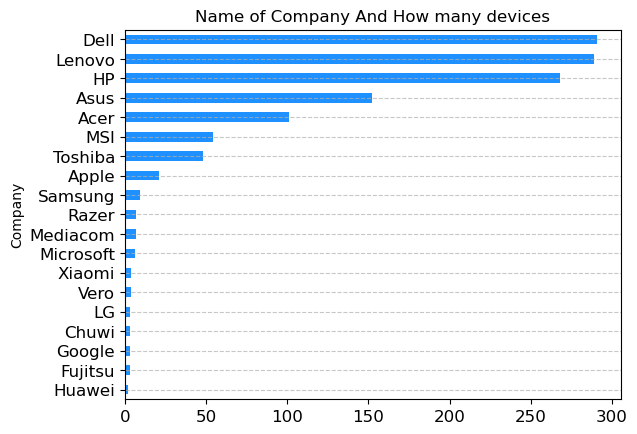

In [72]:
df['Company'].value_counts().sort_values(ascending=True).plot(kind='barh',color='dodgerblue')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title('Name of Company And How many devices')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

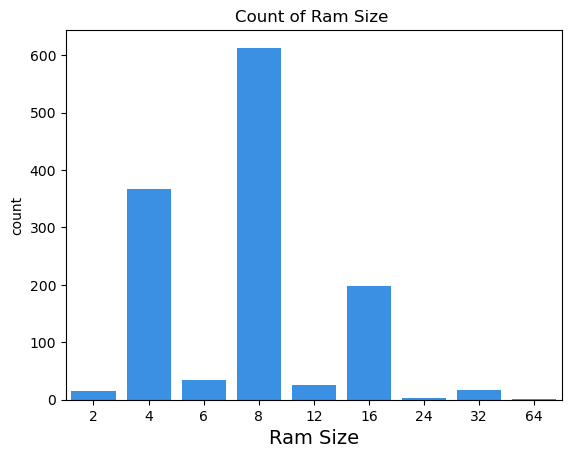

In [73]:
sns.countplot(x='Ram',data=df, color='dodgerblue')
plt.title('Count of Ram Size ')
plt.xlabel('Ram Size',fontsize=14,c='k')
plt.show()

In [26]:
df.head()

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560,...,Yes,Intel,2.3,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440,...,No,Intel,1.8,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920,...,No,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880,...,Yes,Intel,2.7,Core i7,512,0,SSD,No,AMD,Radeon Pro 455
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,2560,...,Yes,Intel,3.1,Core i5,256,0,SSD,No,Intel,Iris Plus Graphics 650


# Data Preprocessing

In [54]:
# Drop any columns that are not relevant or have high cardinality
df = df.drop(columns=['Company', 'Product', 'CPU_model', 'GPU_model'])  # Adjust columns based on your needs

# Convert categorical variables into numerical representations using one-hot encoding
df = pd.get_dummies(df, columns=['TypeName', 'OS', 'CPU_company', 'PrimaryStorageType', 'SecondaryStorageType', 'GPU_company','Screen', 'Touchscreen', 'IPSpanel', 'RetinaDisplay'], drop_first=True)

# Split the data into features (X) and target variable (y)
X = df.drop('Price_euros', axis=1)
y = df['Price_euros']


# Train-Test-Split

In [55]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling

In [56]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Building

In [40]:
# Initialize the regression models
lr = LinearRegression()
rf = RandomForestRegressor(random_state=42)

# Train the Linear Regression model
lr.fit(X_train_scaled, y_train)

# Train the Random Forest Regressor model
rf.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

# Model Prediction

In [41]:
# Make predictions on the test set using Linear Regression
y_pred_lr = lr.predict(X_test_scaled)

# Make predictions on the test set using Random Forest Regressor
y_pred_rf = rf.predict(X_test_scaled)

# Model Evaluation

In [42]:
print("Linear Regression Evaluation:")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred_lr):.2f}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_lr):.2f}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, y_pred_lr)):.2f}")
print(f"R2 Score: {r2_score(y_test, y_pred_lr):.2f}")

print("\nRandom Forest Regressor Evaluation:")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred_rf):.2f}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_rf):.2f}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, y_pred_rf)):.2f}")
print(f"R2 Score: {r2_score(y_test, y_pred_rf):.2f}")


Linear Regression Evaluation:
Mean Absolute Error: 259.59
Mean Squared Error: 127230.65
Root Mean Squared Error: 356.69
R2 Score: 0.74

Random Forest Regressor Evaluation:
Mean Absolute Error: 188.96
Mean Squared Error: 74479.34
Root Mean Squared Error: 272.91
R2 Score: 0.85


In [61]:
df.columns

Index(['Inches', 'Ram', 'Weight', 'Price_euros', 'ScreenW', 'ScreenH',
       'CPU_freq', 'PrimaryStorage', 'SecondaryStorage', 'TypeName_Gaming',
       'TypeName_Netbook', 'TypeName_Notebook', 'TypeName_Ultrabook',
       'TypeName_Workstation', 'OS_Chrome OS', 'OS_Linux', 'OS_Mac OS X',
       'OS_No OS', 'OS_Windows 10', 'OS_Windows 10 S', 'OS_Windows 7',
       'OS_macOS', 'CPU_company_Intel', 'CPU_company_Samsung',
       'PrimaryStorageType_HDD', 'PrimaryStorageType_Hybrid',
       'PrimaryStorageType_SSD', 'SecondaryStorageType_Hybrid',
       'SecondaryStorageType_No', 'SecondaryStorageType_SSD',
       'GPU_company_ARM', 'GPU_company_Intel', 'GPU_company_Nvidia',
       'Screen_Full HD', 'Screen_Quad HD+', 'Screen_Standard',
       'Touchscreen_Yes', 'IPSpanel_Yes', 'RetinaDisplay_Yes'],
      dtype='object')

# Prediction

In [64]:
def predict_laptop_price(features):
    """
    Predicts the price of a laptop based on the given features.
    
    Parameters:
    features (dict): A dictionary containing the laptop features.
    
    Returns:
    float: Predicted laptop price in euros.
    """
    # Convert the input features into a DataFrame
    input_data = pd.DataFrame([features])

    # Perform one-hot encoding only on the columns that are present in the input features
    input_data_encoded = pd.get_dummies(input_data, drop_first=True)

    # Ensure the encoded input data matches the training data columns
    input_data_encoded = input_data_encoded.reindex(columns=X.columns, fill_value=0)

    # Standardize the input data using the scaler that was fitted on the training data
    input_data_scaled = scaler.transform(input_data_encoded)
    
    # Use the trained Random Forest model to predict the laptop price
    predicted_price = rf.predict(input_data_scaled)[0]
    
    return round(predicted_price, 2)


# Testing the prediction

In [65]:
# Example features of a laptop to predict its price
laptop_features = {
    'Inches': 15.6,
    'Ram': 8,
    'Weight': 1.86,
    'ScreenW': 1920,
    'ScreenH': 1080,  # Assuming you have a column for height if needed
    'CPU_freq': 2.5,
    'PrimaryStorage': 256,
    'SecondaryStorage': 0,
    'RetinaDisplay': 0,  # 0 for No, 1 for Yes
    'TypeName_Gaming': 0,
    'TypeName_Netbook': 0,
    'TypeName_Notebook': 0,
    'TypeName_Ultrabook': 1,  # Example for Ultrabook
    'TypeName_Workstation': 0,
    'OS_Chrome OS': 0,
    'OS_Linux': 0,
    'OS_Mac OS X': 0,
    'OS_No OS': 0,
    'OS_Windows 10': 1,
    'OS_Windows 10 S': 0,
    'OS_Windows 7': 0,
    'OS_macOS': 0,
    'CPU_company_Intel': 1,
    'CPU_company_Samsung': 0,
    'PrimaryStorageType_HDD': 0,
    'PrimaryStorageType_Hybrid': 0,
    'PrimaryStorageType_SSD': 1,
    'SecondaryStorageType_Hybrid': 0,
    'SecondaryStorageType_No': 1,
    'SecondaryStorageType_SSD': 0,
    'GPU_company_ARM': 0,
    'GPU_company_Intel': 1,
    'GPU_company_Nvidia': 0,
    'Screen_Full HD': 1,
    'Screen_Quad HD+': 0,
    'Screen_Standard': 0,
    'Touchscreen_Yes': 0,
    'IPSpanel_Yes': 0,
}

# Predict the price of the laptop
predicted_price = predict_laptop_price(laptop_features)
print(f"Predicted Laptop Price: €{predicted_price}")


Predicted Laptop Price: €1151.37
